# Nadaraya-Watson Model
## Kernel Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed, uniform, randn
from scipy.stats import norm

In [2]:
%config InlineBackend.figure_format="retina"

In [3]:
def kernel_reg_o2(x, X, t, sigma):
    """   
    Returns :
    The conditional expectation E[t|x] and conditional variance[t|x]
    """
    pdf_vals = norm.pdf(x - X[:, np.newaxis], loc=0, scale=sigma).T
    pdf_vals = pdf_vals / pdf_vals.sum(axis=1, keepdims=True)

    # Conditional Expectation  E[t|x]
    Et = (pdf_vals * t[np.newaxis, :]).sum(axis=1)
    # Conditional Variance V[t|x]
    Vt = sigma ** 2 + (pdf_vals * t[np.newaxis, : ] ** 2).sum(axis=1) - Et ** 2
    return Et, Vt

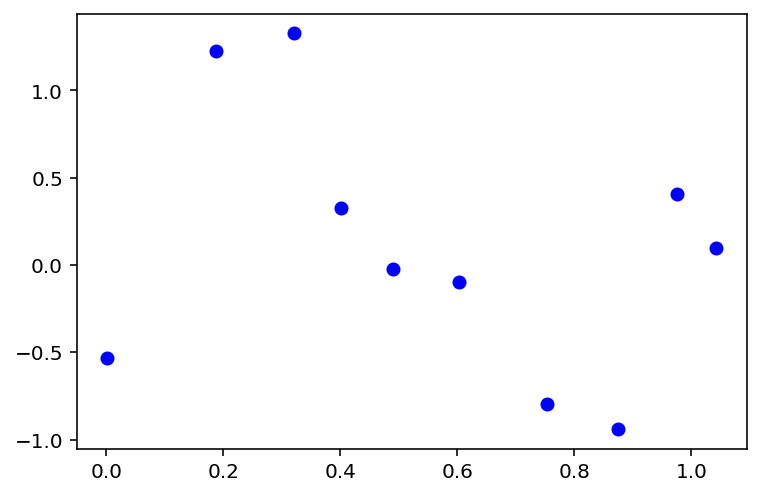

In [4]:
seed(1643)
nobs = 10
X = np.linspace(0, 1, nobs) + uniform(size=nobs) * 0.1
t = np.sin(2 * np.pi * X) + randn(nobs) * 0.4

plt.plot(X, t, 'bo')

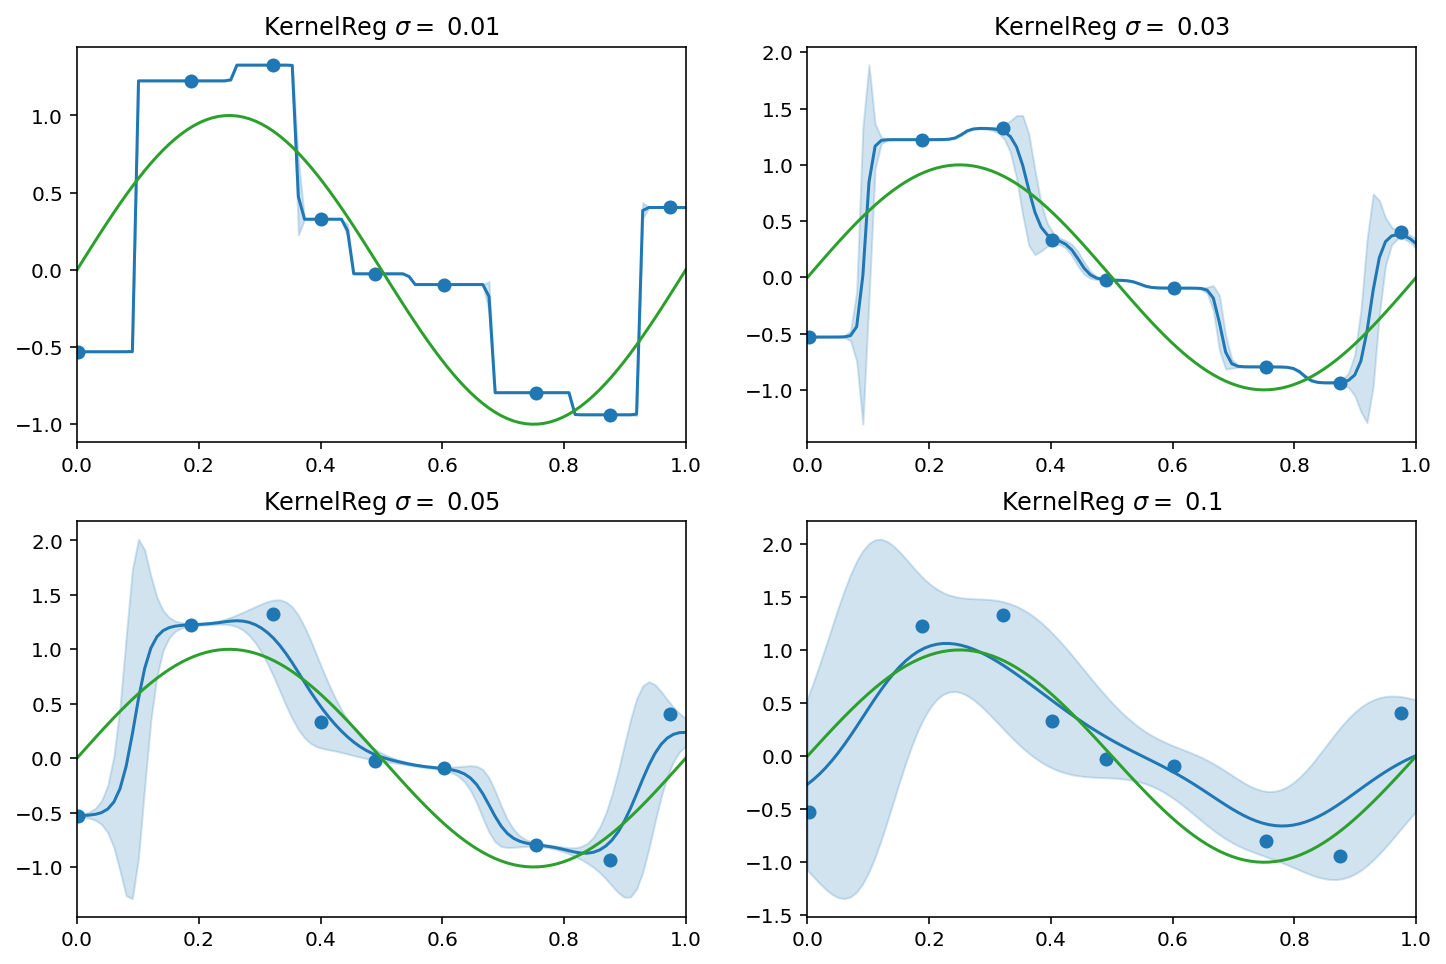

In [6]:
sigma=0.09
ntest = 100
x = np.linspace(0, 1, ntest)

sigmas = [0.01, 0.03, 0.05, 0.1] 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for sigma, axi in zip(sigmas, ax.ravel()):
    Et, Vt = kernel_reg_o2(x, X, t, sigma)
    axi.scatter(X, t)
    axi.plot(x, Et, color="tab:blue")
    axi.fill_between(x, Et - 2 * Vt, Et + 2 * Vt, alpha=0.2, color="tab:blue")
    axi.plot(x, np.sin(x * 2 * np.pi), c="tab:green")
    axi.set_title("KernelReg " r"$\sigma=$ " f"{sigma}")
    axi.set_xlim(0, 1);

In [7]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(precision=3, suppress=True)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [8]:
nsteps = 100
x = np.linspace(-1, 1, nsteps)

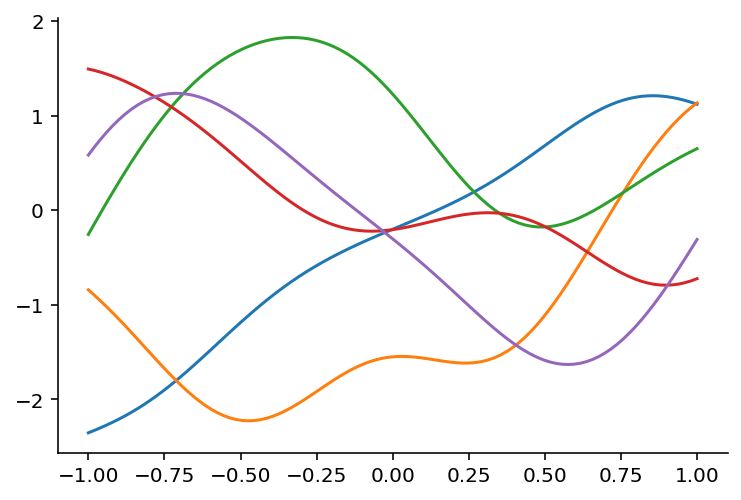

In [9]:
sigma = 0.2
E = np.zeros_like(x)
K = np.exp(-(x[:, np.newaxis] - x[np.newaxis, :])**2 / (2 * sigma))

plt.plot(x, np.random.multivariate_normal(E, K, size=5).T);